In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns

sns.set_theme(style="darkgrid")


## Compare wind gusts

In [15]:
# Load data from MED-R
directory = '/network/group/aopp/predict/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/'

experiments = ['incr', 'pi']
cfpf = ['cf', 'pf']  # control and perturbed are treated equally
members = {'pi' : ['b2nn_2022-02-14', 'b2ns_2022-02-16', 'b2nq_2022-02-10'], 
           'incr' : ['b2no_2022-02-14', 'b2nr_2022-02-10', 'b2nt_2022-02-16']}  # members for incr and pi runs

wind_gusts_pi = []
wind_gusts_incr = []

for experiment in experiments:
    for cont in cfpf:
        for member in members[experiment]:
            if experiment == 'pi':
                wind_gusts_pi = xr.open_dataset(os.path.join(directory,experiment,'EU025/sfc',cont,member+'.nc')).fg10.values.flatten()
            elif experiment == 'incr':
                wind_gusts_incr = xr.open_dataset(os.path.join(directory,experiment,'EU025/sfc',cont,member+'.nc')).fg10.values.flatten()


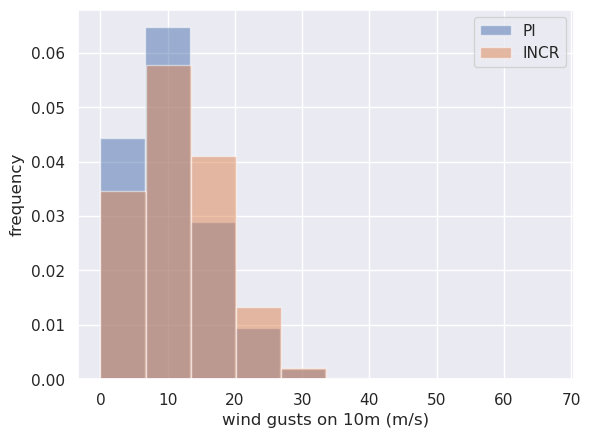

In [17]:
plt.hist(wind_gusts_pi, alpha = 0.5, density = True, label = 'PI')
plt.hist(wind_gusts_incr, alpha = 0.5, density = True, label = 'INCR')
plt.xlabel('wind gusts on 10m (m/s)')
plt.ylabel('frequency')
plt.legend()

In [7]:
wind_gusts_incr

[array([ 0.      ,  0.      ,  0.      , ..., 10.332445, 12.648869,
        14.066459], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 11.545746, 12.227148,
        13.073924], dtype=float32),
 array([1.9073486e-06, 1.9073486e-06, 1.9073486e-06, ..., 9.7463884e+00,
        1.0829488e+01, 1.1396394e+01], dtype=float32),
 array([0.      , 0.      , 0.      , ..., 5.447418, 5.035866, 4.630207],
       dtype=float32),
 array([0.       , 0.       , 0.       , ..., 2.1797256, 4.0203323,
        5.2954044], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 7.451954 , 7.6309643,
        7.1450787], dtype=float32)]

## Compare CAPEs

## Storm track